# M3.D1: Boltzmann factor and partition functions

## Learning Objectives:

* Using the vibrational energy levels to calculate and explain what the Boltzmann factor is.
* Calculating the probability of a given energy level.
* Calculate the partition function of a vibrational system at a given temperature.
* Use python to simulate the "money game" and show how the Boltzmann distribution is the most probable distribution
* Investigate how "the density of states" changes the partition function and the probabilities applied to the vibrational states of several diatomic molecules


# Goals: The main question Statistical Thermodynamics will answer

Statistical Thermodynamics or Statistical Mechanics will tell us how the atomic and molecular structure are connected and affect the macroscopic world.

In this session we will learn:
* What the Boltzmann factor is
* What the partition function is
* The dependency of the above magnitudes on temperature and "density of states"
* What the Boltzmann distribution is
* How degeneracy affects the Boltzmann distribution

Starting questions:

You have an infinite collection of molecules of Br<sub>2</sub> at a room temperature 300K.
* **What is the probability that if I pick a random molecule of Br<sub>2</sub> it has a specific vibrational energy?**
* **Given a certain amount of energy (in quanta) how is that energy going to be distributed among the molecules? Will the energy be evenly distributed as in will each molecule have an equal amount of energy? Will most energy be accumulated in one small group of molecules?**

# The Boltzmann factor: the probability of an energy level.

Think of the vibrational levels of a diatomic molecule:

$$
E_v = \hbar\omega(v+1/2) = \hbar \sqrt{\left(\frac{k}{\mu}\right)}(v+1/2)
$$

where there are infinite levels v=0,1,2,3,4...

For a reason we will explain later, we want to consider our zero of energy the lowest energy so

$$
E_v = \hbar\omega(v+1/2)-ZeroPointEnergy = \hbar\omega v
$$


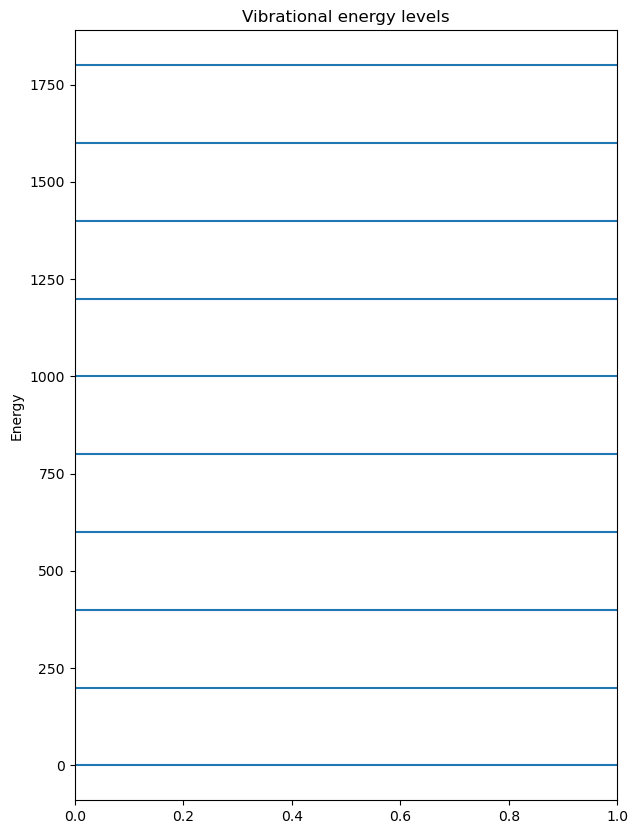

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,10))
ax = plt.subplot()
enes=[]
hbar=1
freq=200 # in cm-1 so that energy is in cm-1
for v in range(10):
    ene=hbar*freq*v
    ax.axhline(ene)
    enes.append(ene)
ax.set_title("Vibrational energy levels")
ax.set_ylabel("Energy");

**The question is, are all energy states equally available? What is the probability of finding a molecule at a given energy?**

(note: this formulation was first designed for macroscopic systems where temperature was defined, but to make things more relatable, we are starting discussing it in a context of one molecule at a constant temperature)

The probability is given by the Boltzmann factor. For a molecule with an energy Ei is


$$
a_i = C \cdot e^{-\frac{-E_i}{K_B T}}
$$

Notice that $K_B$ is the Boltzmann constant and T is the temperature.

For the time being, $C$ is an arbitrary number and has no physical meaning

Let's see how the Boltzmann factor changes if we change the energy:

When energy is  0  the non-normalized probability is  1.0
When energy is  200  the non-normalized probability is  0.38318682541829635
When energy is  400  the non-normalized probability is  0.1468321431741519
When energy is  600  the non-normalized probability is  0.05626414281226805
When energy is  800  the non-normalized probability is  0.021559678269114646
When energy is  1000  the non-normalized probability is  0.008261384672981873
When energy is  1200  the non-normalized probability is  0.003165653766399294
When energy is  1400  the non-normalized probability is  0.0012130368171200184
When energy is  1600  the non-normalized probability is  0.00046481972706773425
When energy is  1800  the non-normalized probability is  0.00017811279560688402


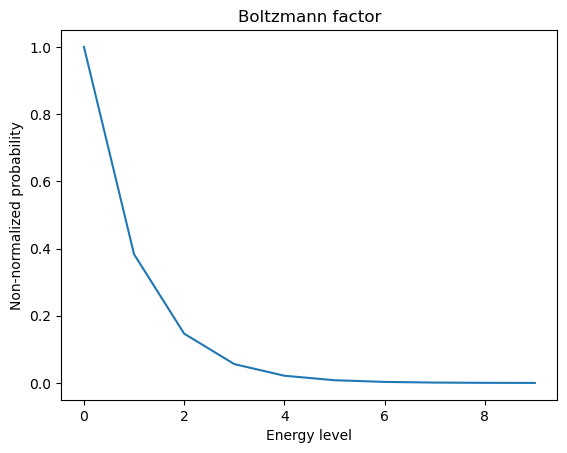

In [2]:
import numpy as np
C=1
KB=0.695 # this is KB in cm-1/Kelvin units
T=300 # room temperature
ais=[]
for ene in enes:
    ai = C*np.exp(-ene/(KB*T))
    ais.append(ai)
    print("When energy is ",ene," the non-normalized probability is ",ai)

import matplotlib.pyplot as plt

plt.plot(ais);
plt.title("Boltzmann factor")
plt.xlabel("Energy level")
plt.ylabel("Non-normalized probability");

Conclusion: the higher the energy, the lower the probability of a molecule to have that energy.

* What is the effect of temperature? Repeat the above script at a higher temperature


# Partition functions give us the overall number of states available and it allows us to calculate the normalized probability

The probability that the Boltzmann factor gives us is not a true probability because it is not normalized.

If we add **all possible energy states**, the overall probability will be one.

$$
p_i=\textrm{Normalized probability} = \frac{\textrm{probability of one state E}}{\textrm{Adding all states E}}=
\frac{C e^{-\frac{-Ei}{K_B T}}}{\sum_k^{all states} C e^{-\frac{E_k}{K_B T}}}
$$

The factor $C$ cancels out
$$
p_i=\frac{C e^{-\frac{-Ei}{K_B T}}}{\sum_k^{all states} C e^{-\frac{E_k}{K_B T}}}=\frac{e^{-\frac{-Ei}{K_B T}}}{\sum_k^{all states}  e^{-\frac{E_k}{K_B T}}}
$$


The partition function q(T) can be thought as the total number of energy states available, and it's a weigted sum of all states where lower energy states contribute more

$$
q(T) = \sum_k^{all states}  e^{-\frac{E_k}{K_B T}}
$$

so

$$
p_i = \frac{e^{-\frac{-Ei}{K_B T}}}{q(T)}
$$


**How many states are available at a given temperature?** 

The number of states available at a given temperature is called the partition function.

In [3]:
#Calculate q
q=0
KB=0.695 # this is KB in cm-1/Kelvin units
T=300 # room temperature
for v in range(10):
    boltz = np.exp(-enes[v]/(KB*T))
    q = q + boltz
    print(boltz,q)

1.0 1.0
0.38318682541829635 1.3831868254182964
0.1468321431741519 1.5300189685924483
0.05626414281226805 1.5862831114047165
0.021559678269114646 1.607842789673831
0.008261384672981873 1.6161041743468127
0.003165653766399294 1.619269828113212
0.0012130368171200184 1.620482864930332
0.00046481972706773425 1.6209476846573998
0.00017811279560688402 1.6211257974530067


When energy is  0  the normalized probability is  0.6168552752483035
When energy is  200  the normalized probability is  0.23637081466492682
When energy is  400  the normalized probability is  0.09057418209298979
When energy is  600  the normalized probability is  0.034706833301071466
When energy is  800  the normalized probability is  0.013299201272959584
When energy is  1000  the normalized probability is  0.00509607871638435
When energy is  1200  the normalized probability is  0.0019527502254130652
When energy is  1400  the normalized probability is  0.000748268159710895
When energy is  1600  the normalized probability is  0.0002867265006812085
When energy is  1800  the normalized probability is  0.00010986981755932928


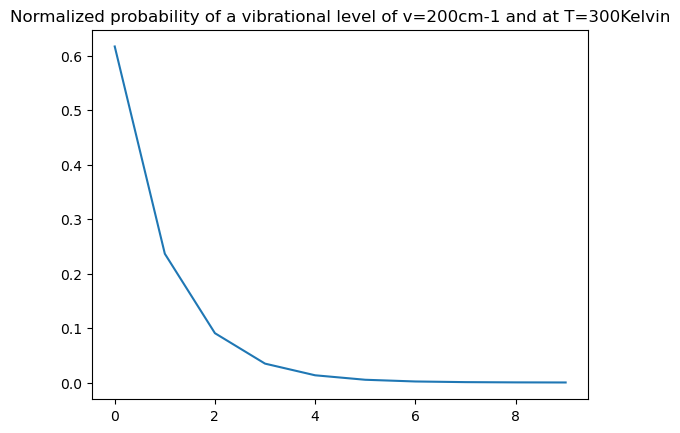

In [4]:
pis = []
for v in range(10):
    pi = np.exp(-enes[v]/(KB*T))/q
    pis.append(pi)
    print("When energy is ",enes[v]," the normalized probability is ",pi)
    
plt.plot(pis)
plt.title("Normalized probability of a vibrational level of v="+str(freq)+"cm-1 and at T="+str(T)+"Kelvin");

* Repeat the above calculation of probabilities at a higher temperature

# Boltzmann distribution: the function of probabilities give us how energy is distributed.

So far we have just identified the Boltzmann factor as the probability $p_i$ for a system to have an energy $E_i$. However, you can see the function of probabilities $p(i)$ 

In how many ways can you distribute 7 units of energy among 9 molecules.

A way to understand this is that imagine that you want to know how you can distribute 7 undistinguishable apples to 9 different (distinguishable) students. It's important to realize that the distribution of giving one apple to each student is not as likely as one student with 3 apples, another with 2 and 2 students with one each.

<img src="./distributions.gif" />

Click [here](https://drive.google.com/file/d/1-421erhWwncGhYWvQOWH4ZvOqDSAbR5z/view) if you can't see the image.

These number can also be seen when distributing 7 quanta of energy among 9 particles [https://www.stolaf.edu/depts/chemistry/imt/js/boltz/index.htm](https://www.stolaf.edu/depts/chemistry/imt/js/boltz/index.htm)

In this sense, the Boltzmann distribution is just one of the possible 15 distribution (labeled above as J), but it is the most probable one as it the one with the highest number of instances.

The number of possibilities (W: microstates) of the most common distribution can be calculated as

$$
W = \frac{N_{mol}!}{N_{mol 1}! N_{mol 2}! N_{mol 3}!...} = \frac{9!}{5! 2! 1! 1!} = 1512
$$

If we recall from the videos that Boltzmann's equation relates to the entropy

$$
S = K_B ln(W)
$$

We can rephrase the 2nd law of thermodynamics not as "disorder" but as the system will evolve towards a more probable distribution which will be the one with the highest number of microstates (W).

## The Boltzmann game: example of a Boltzmann distribution

The following is a Python implementation of the "Boltzmann game" as described here https://pubs.acs.org/doi/10.1021/ed083p581

Imagine you give one dollar bill to each of your 30 students. Students start playing "rock,paper,scissors" among random pairs and whoever loses gives the dollar bill to the winner. After several iterations you will see that the majority of students have no money, a handful have one dollar bill, and even fewer students have two bills. This trend follows a Boltzmann distribution.

The bets keep going and money is exchanged. Every distribution of money is what it is called a **microstate**.

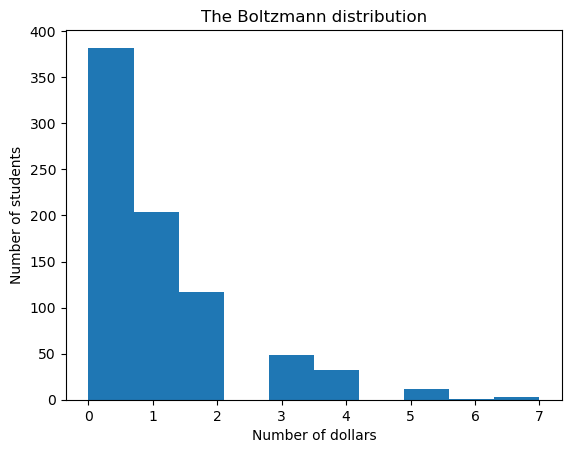

In [6]:
import random
import numpy as np
import pandas as pd
nstudents = 800 #choose an even number
npairs = int(nstudents/2)
nbets = 20000
#we give a dollar to all students
distr = np.ones(nstudents)
for bet in range(nbets):
    for n in range(npairs):
        #play
        if np.random.random() > 0.5:
            #student can only give if it has any money.
            if distr[2*n+1] > 0:
                #first student wins, second student loses
                distr[2*n] = distr[2*n] + 1
                distr[2*n+1] = distr[2*n+1] - 1
        else:
            if distr[2*n] > 0:
                #first student loses, second student wins
                distr[2*n] = distr[2*n] - 1
                distr[2*n+1] = distr[2*n+1] + 1
    #randomize players
    random.shuffle(distr)
boltzmann = pd.Series(distr)
ax=boltzmann.plot.hist();
ax.set_title('The Boltzmann distribution')
ax.set_xlabel('Number of dollars')
ax.set_ylabel('Number of students');


The money game can be thought as a model for how a collective of molecules will exchange energy. For simplicity notice that this model would emulate the vibrational harmonic oscillator where levels are equally spaced, that is, one dollar bill increases your "energy" by a unit of one.



# Density of states

The density of states tell us how closely spaced are the energy levels. For example, a typical C=O vibration will have a frequency of 1750 cm-1 while the C-H will be around 3000 cm-1. 

The partition function for the vibration C=O with freq=1750cm-1 at T=300K is q=1.0002264335658049
The partition function for the vibration C-H with freq=3000cm-1 at T=300K is q=1.0000005638437601


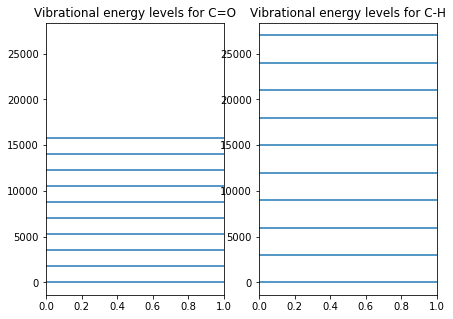

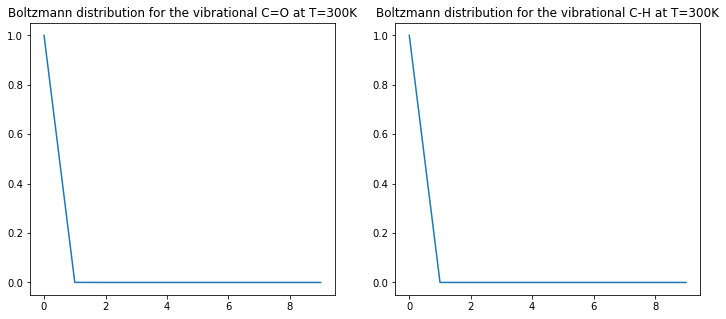

In [5]:
fig = plt.figure(figsize=(7,5))
ax1 = plt.subplot(121) #121 means: the subplots will be 1 row 2 columns and this one is subplot number 1
ax2 = plt.subplot(122, sharey = ax1) #share-y means that it will share the y-axis with the ax1 plot

freqCH = 3000
freqCO = 1750
hbar = 1 #working in cm-1 units

#Calculate the energies
enesCO = []
enesCH = []
for v in range(10):
    eneCO = hbar*freqCO*v
    eneCH = hbar*freqCH*v
    ax1.axhline(eneCO)
    ax2.axhline(eneCH)
    enesCO.append(eneCO)
    enesCH.append(eneCH)
ax1.set_title("Vibrational energy levels for C=O")
ax2.set_title("Vibrational energy levels for C-H")
    
#Calculate q
qCH=0
qCO=0
KB=0.695 # this is KB in cm-1/Kelvin units
T=300 # room temperature
for v in range(10):
    boltzCH = np.exp(-enesCH[v]/(KB*T))
    boltzCO = np.exp(-enesCO[v]/(KB*T))
    qCH = qCH + boltzCH
    qCO = qCO + boltzCO
    
print("The partition function for the vibration C=O with freq="+str(freqCO)+"cm-1 at T="+str(T)+"K is q="+str(qCO))
print("The partition function for the vibration C-H with freq="+str(freqCH)+"cm-1 at T="+str(T)+"K is q="+str(qCH))

pCO =[]
pCH =[]
for v in range(10):
    pCO.append( np.exp(-enesCO[v]/(KB*T))/qCO)
    pCH.append( np.exp(-enesCH[v]/(KB*T))/qCH)

fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(121) #121 means: the subplots will be 1 row 2 columns and this one is subplot number 1
ax2 = plt.subplot(122, sharey = ax1) #share-y means that it will share the y-axis with the ax1 plot

ax1.plot(pCO)
ax1.set_title("Boltzmann distribution for the vibrational C=O at T="+str(T)+"K")
ax2.plot(pCH);
ax2.set_title("Boltzmann distribution for the vibrational C-H at T="+str(T)+"K");

* Build a function that given a vibrational frequency, a temperature and a given number of levels, returns the partition function
* Build a function that given a vibrational frequency, a temperature and a given number of levels, returns a list of normalized probabilities for each of those levels
* Investigate how temperature changes the partition function and the probabilities. Plot in the same graph the probabilities of the levels at the two different temperatures.
* Investigate how "the density of states" changes the partition function and the probabilities. Plot in the same graph the probabilities of the levels of two different frequencies. As you can see above when frequencies are 17500 and 3000 the Boltzmann distribution become almost identical. To visually see the difference compare lower frequencies such as 200cm-1 and 400cm-1


# How degeneracy affect Boltzmann distributions

Remember that the rotational levels have a degeneracy of 2J+1, therefore for each energy level one needs to multiply it by 2J+1. In this context we say that each *level* J has 2J+1 *states* of the same energy.

To the probability becomes:

$$
p_J = \frac{(2J+1)e^{-\frac{-E_J}{K_B T}}}{\sum_k^{all levels} (2k+1) e^{-\frac{E_k}{K_B T}}}
$$

Remember that one can express the energy of the rotational levels as function of the rotational constant $B$

$$
E_J = J(J+1)B
$$

or with the moment of inertia

$$
E_J = J(J+1)\frac{\hbar^2}{2I}
$$

* What would the Boltzmann distribution look like in the case of 2J+1 degeneracy? Build a python function that allows you to calculate the Boltzmann distribution. Plot in the same graph exploring the following variables:
   * Comparing different temperatures
   * Comparing different moments of inertia

#  Questions

* Submit in a separate notebook the exercises listed above